In [2]:
# -*- coding: utf-8 -*-
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import re

In [15]:
# ignore warings
import warnings
warnings.simplefilter("ignore")

In [16]:
"""
Interface for converting POS tags from various treebanks
to the universal tagset of Petrov, Das, & McDonald.

The tagset consists of the following 12 coarse tags:

VERB - verbs (all tenses and modes)
NOUN - nouns (common and proper)
PRON - pronouns
ADJ - adjectives
ADV - adverbs
ADP - adpositions (prepositions and postpositions)
CONJ - conjunctions
DET - determiners
NUM - cardinal numbers
PRT - particles or other function words
X - other: foreign words, typos, abbreviations
. - punctuation

@see: http://arxiv.org/abs/1104.2086 and http://code.google.com/p/universal-pos-tags/

"""


# mapping from STTS to the universal tagset
stts_to_universal = {
    'VVFIN': 'VERB',
    'VVIMP': 'VERB',
    'VVINF': 'VERB',
    'VVIZU': 'VERB',
    'VVPP': 'VERB',
    'VAFIN': 'VERB',
    'VAIMP': 'VERB',
    'VAINF': 'VERB',
    'VAPP': 'VERB',
    'VMFIN': 'VERB',
    'VMINF': 'VERB',
    'VMPP': 'VERB',
    'NN': 'NOUN',
    'NE': 'NOUN',
    'PDS': 'PRON',
    'PDAT': 'PRON',
    'PIS': 'PRON',
    'PIAT': 'PRON',
    'PIDAT': 'PRON',
    'PPER': 'PRON',
    'PPOSS': 'PRON',
    'PPOSAT': 'PRON',
    'PRELS': 'PRON',
    'PRELAT': 'PRON',
    'PRF': 'PRON',
    'PWS': 'PRON',
    'PWAT': 'PRON',
    'PWAV': 'PRON',
    'ADJA': 'ADJ',
    'ADJD': 'ADJ',
    'ADV': 'ADV',
    'PAV': 'ADV',
    'APPR': 'ADP',
    'APPRART': 'ADP',
    'APPO': 'ADP',
    'KOUI': 'CONJ',
    'KOUS': 'CONJ',
    'KON': 'CONJ',
    'KOKOM': 'CONJ',
    'ART': 'DET',
    'CARD': 'NUM',
    'PTKZU': 'PRT',
    'PTKNEG': 'PRT',
    'PTKVZ': 'PRT',
    'PTKANT': 'PRT',
    'PTKA': 'PRT',
    'TRUNC': 'PRT',
    'APZR': 'X',
    'FM': 'X',
    'ITJ': 'X',
    'SGML': 'X',
    'SPELL': 'X',
    'XY': 'X',
    '$,': ',',
    '$.': '.',
    '$(': 'X',
}

In [17]:
#read the file line by line( obtain a list with each element being a string of each row of the file )
with open('POS_German_train.txt', 'r', encoding = "ISO-8859-1") as f:
    data = f.readlines() #decode() # splitlines()

In [18]:
#data = uploaded['POS_German_train.txt'].decode().splitlines()
#print(data[0])
def preprocess_data(data):
    datamod = [sentence.lower() for sentence in data]
    datamod2 = []
    for row in datamod:
        datamod2.append(re.findall('(\S+)/(\S+)',row))
    
    datamod3 = []
    for sentence in datamod2:
        sentencemod = []
        for tuple_ in sentence:
            original_tag = tuple_[1]
            tuplemod = (tuple_[0],stts_to_universal[original_tag.upper()])
            sentencemod.append(tuplemod)
        datamod3.append(sentencemod)
    
    sentences, sentence_tags =[], [] 
    for tagged_sentence in datamod3:
        sentence, tags = zip(*tagged_sentence)
        sentences.append(list(sentence))
        sentence_tags.append(list(tags))
        
    
    return sentences, sentence_tags

    

In [162]:
# throw the list of strings to the preprocess function to obtain the two lists, one for words in sentences and the other for tags in sentences
sentences,sentence_tags = preprocess_data(data)
print(sentences[5])
print(len(sentences))
print(len(sentence_tags))

['dass', 'perot', 'ein', 'unternehmen', 'erfolgreich', 'leiten', 'kann', ',', 'davon', 'sind', 'selbst', 'seine', 'kritiker', 'ueberzeugt', '.']
40000
40000


In [20]:
# The next in the algorithm is to transform words and tags into numbers, because neural network only works with numbers and not with 
# string.
# How to do that? Create a dictionary of words corresponding to numbers (integers) and a dictionary of tags corresponding to numbers:
# e.g word2idx converts a word to an index
# e.g word2idx = {'ich':1, 'du':2,'er':3,...'davon':3432}

# create a set of words (unique words) to later put it as keys in the dictionarywords = set()
for sentence in sentences:
    for word in sentence:
        words.add(word)
        
words

{'ue',
 'nickel',
 'margrethe',
 'weiterentwickelte',
 'muelheimer',
 'kleinstwinzern',
 'wolodymir',
 'kloeco',
 'radschub',
 'tv-apparat',
 'vererbt',
 'beschichtetem',
 'sonnenstrasse',
 'wohlfahrt',
 'abschiebeschutz',
 'gruenen-politiker',
 'massenartikeln',
 'weitreichenderem',
 'schlachttiere',
 '42,3',
 'gaensedaunen',
 'erschien',
 'gewerkschaftsbewegung',
 'wuensch',
 'mangelnden',
 'siegte',
 'bley',
 '420',
 'zeuge',
 'heilen',
 'titelte',
 'naturverehrung',
 'studienabschlussfoerderung',
 'bordlautsprecher',
 'dena',
 'vorruhestands-',
 'wiederherzustellen',
 'geldhahns',
 'filip',
 'bereden',
 'urlaubermasse',
 'kabinettsitzung',
 'multimediale',
 'ordensschwestern',
 'vermoegensbildungsansaetze',
 'zertifizierung',
 'speed',
 'vergasungen',
 'traditionell-akademische',
 'polizeieinsatz',
 'schlaege',
 'heimsuchte',
 'mitsui',
 'deserteuren',
 'schoenborn-domizil',
 'giuseppe',
 'exzentrik',
 'arbeiterproteste',
 'lagere',
 'kairoer',
 'kaution',
 'ungargasse',
 'terminvo

In [21]:
# create a set of tags (unique tags) to later put it as keys in the dictionary
tags = set()
for sentence in sentence_tags:
    for tag in sentence:
        tags.add(tag)
tags

{',',
 '.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [22]:
from sklearn.model_selection import train_test_split
# separate the sentences and sentence_tags into train and test datasets  
 
(train_sentences, 
 test_sentences, 
 train_tags, 
 test_tags) = train_test_split(sentences, sentence_tags, test_size=0.2)

In [23]:
# create the dictionaries of words and tags with the corresponding integer from the index in the sets
word2idx = {w: i+2 for i, w in enumerate(list(words))}
word2idx['__PAD__'] = 0  # The special value used for padding
word2idx['__OOV__'] = 1  # The special value used for OOVs

tag2idx = {t: i+1 for i, t in enumerate(list(tags))}
tag2idx['__PAD__'] = 0  # The special value used for padding

word2idx

{'ue': 2,
 'nickel': 3,
 'margrethe': 4,
 'weiterentwickelte': 5,
 'muelheimer': 6,
 'kleinstwinzern': 7,
 'wolodymir': 8,
 'kloeco': 9,
 'radschub': 10,
 'tv-apparat': 11,
 'vererbt': 12,
 'beschichtetem': 13,
 'sonnenstrasse': 14,
 'wohlfahrt': 15,
 'abschiebeschutz': 16,
 'gruenen-politiker': 17,
 'massenartikeln': 18,
 'weitreichenderem': 19,
 'schlachttiere': 20,
 '42,3': 21,
 'gaensedaunen': 22,
 'erschien': 23,
 'gewerkschaftsbewegung': 24,
 'wuensch': 25,
 'mangelnden': 26,
 'siegte': 27,
 'bley': 28,
 '420': 29,
 'zeuge': 30,
 'heilen': 31,
 'titelte': 32,
 'naturverehrung': 33,
 'studienabschlussfoerderung': 34,
 'bordlautsprecher': 35,
 'dena': 36,
 'vorruhestands-': 37,
 'wiederherzustellen': 38,
 'geldhahns': 39,
 'filip': 40,
 'bereden': 41,
 'urlaubermasse': 42,
 'kabinettsitzung': 43,
 'multimediale': 44,
 'ordensschwestern': 45,
 'vermoegensbildungsansaetze': 46,
 'zertifizierung': 47,
 'speed': 48,
 'vergasungen': 49,
 'traditionell-akademische': 50,
 'polizeieinsatz'

In [50]:
# convert each word to an integer using the translation dictionaries and looping over the lists (using nested list comprehension)train_X = np.array([[word2idx[word] for word in sentence]for sentence in train_sentences])
test_X = np.array([[word2idx[word] for word in sentence]for sentence in test_sentences])
train_y = np.array([[tag2idx[tag] for tag in sentence]for sentence in train_tags])
test_y = np.array([[tag2idx[tag] for tag in sentence]for sentence in test_tags])

print(train_X[5])

[37373, 31532, 37066, 42910, 51552, 14750, 38746, 54140, 64285, 56413, 55344, 2307, 31007, 71961, 44295, 58411, 38746, 2307, 16274, 23456, 4536, 57749, 43313, 38746, 64293, 64696, 4913, 38746, 21257, 12953, 1342, 38746, 6536, 37066, 19734, 42248, 66137, 839, 64248, 35544, 3322, 43431]


In [51]:
# determine the largest sentence so as to be able to pad the other elements and have the corret input and output shape
MAX_SENTENCE_LEN = len(max(train_X, key=len))
print(MAX_SENTENCE_LEN)

130


In [122]:
from keras.preprocessing.sequence import pad_sequences
# pad each row of the matries to have the correct shape 
train_X = pad_sequences(train_X, maxlen=MAX_SENTENCE_LEN, padding='post')
test_X = pad_sequences(test_X, maxlen=MAX_SENTENCE_LEN, padding='post')
train_y = pad_sequences(train_y, maxlen=MAX_SENTENCE_LEN, padding='post')
test_y = pad_sequences(test_y, maxlen=MAX_SENTENCE_LEN, padding='post')
 
print(train_X[0])
print(train_y[0])

[ 4391 69241  2307 54414 63497 39159 47529 30452 46708 10358 56618 64991
 37225 43431     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0]
[10  1  5  9  5  9  6  9  6 12  9 12  9  4  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

#### Set hyperparameters

In [163]:
# vector-space embedding: 
n_dim = 64 
drop_embed = 0.2 


# LSTM layer architecture:
n_lstm = 256 

In [164]:
import keras
import keras.layers as L
#from keras.layers import Conv1D, MaxPooling1D 

# State the topology (architecture) of the neural network (Here use Bidirectional LSTM with softmax output for classification)
model = keras.models.Sequential()
model.add(L.InputLayer(input_shape = (MAX_SENTENCE_LEN, )))
model.add(L.Embedding(len(word2idx),n_dim))
#model.add(SpatialDropout1D(0.2))
model.add(L.Bidirectional(L.LSTM(n_lstm, return_sequences=True)))
model.add(L.TimeDistributed(L.Dense(len(tag2idx))))
model.add(L.Activation('softmax'))



In [165]:
# need to have a special accracy function that can ignore the zeros (padding) while training
def ignore_class_accuracy(to_ignore=0):
    def ignore_accuracy(y_true, y_pred):
        y_true_class = K.argmax(y_true, axis=-1)
        y_pred_class = K.argmax(y_pred, axis=-1)
 
        ignore_mask = K.cast(K.not_equal(y_pred_class, to_ignore), 'int32')
        matches = K.cast(K.equal(y_true_class, y_pred_class), 'int32') * ignore_mask
        accuracy = K.sum(matches) / K.maximum(K.sum(ignore_mask), 1)
        return accuracy
    return ignore_accuracy

In [166]:
# compile the model stating the loss function, optimizer and metrics
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy', ignore_class_accuracy(0)])
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 130, 64)           4676480   
_________________________________________________________________
bidirectional_26 (Bidirectio (None, 130, 512)          657408    
_________________________________________________________________
time_distributed_16 (TimeDis (None, 130, 14)           7182      
_________________________________________________________________
activation_16 (Activation)   (None, 130, 14)           0         
Total params: 5,341,070
Trainable params: 5,341,070
Non-trainable params: 0
_________________________________________________________________


In [167]:
# one hot encode the tags to use them in the neural network

# Create a function to one-hot encode the tags
# Ex: tagmat = [1 2 5 0] with 5 tags in total
# tagencoded = [[0 1 0 0 0],[0 0 1 0 0 ],....]
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [168]:
traincat_y = to_categorical(train_y, len(tag2idx))
testcat_y = to_categorical(test_y, len(tag2idx))
print(traincat_y[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [169]:
# Perform NN training 
model.fit(train_X, traincat_y, batch_size=128, epochs=40, validation_split=0.2)

Train on 25600 samples, validate on 6400 samples
Epoch 1/40
25600/25600 [==============================] - 247s 10ms/step - loss: 0.4005 - acc: 0.8902 - ignore_accuracy: 0.2540 - val_loss: 0.2847 - val_acc: 0.9054 - val_ignore_accuracy: 0.3106
Epoch 2/40
25600/25600 [==============================] - 265s 10ms/step - loss: 0.1744 - acc: 0.9451 - ignore_accuracy: 0.6041 - val_loss: 0.0714 - val_acc: 0.9809 - val_ignore_accuracy: 0.8611
Epoch 3/40
25600/25600 [==============================] - 267s 10ms/step - loss: 0.0378 - acc: 0.9905 - ignore_accuracy: 0.9322 - val_loss: 0.0269 - val_acc: 0.9925 - val_ignore_accuracy: 0.9455
Epoch 4/40
25600/25600 [==============================] - 239s 9ms/step - loss: 0.0154 - acc: 0.9962 - ignore_accuracy: 0.9730 - val_loss: 0.0209 - val_acc: 0.9938 - val_ignore_accuracy: 0.9552
Epoch 5/40
25600/25600 [==============================] - 239s 9ms/step - loss: 0.0100 - acc: 0.9975 - ignore_accuracy: 0.9818 - val_loss: 0.0184 - val_acc: 0.9945 - val_ig

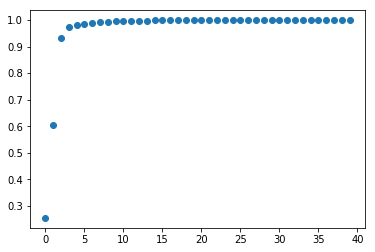

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(model.history.history['ignore_accuracy'],'o')

In [171]:
# How good it performs in the testing set (100 - perfect; 0 - completely opposite classes; 0.5 - binary randomly guessing)
scores = model.evaluate(test_X, testcat_y)
print(f"{model.metrics_names[2]}: {scores[2] * 100}")   

472/472 [==============================] - 1s 3ms/step
ignore_accuracy: 95.51049744713592


In [172]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


#### Start form here with pretrained model

In [173]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [174]:
with open('POS_German_minitest.txt') as f:
  
  data2 = f.readlines()

print(data2[0])

BONN/NE ; ,/$, ; 10./ADJA ; Maerz/NN ; (/$( ; dpa/NE ; )/$( ; ./$. ; 



In [175]:
sentences,sentence_tags = preprocess_data(data2)

print(sentences[0])

['bonn', ',', '10.', 'maerz', '(', 'dpa', ')', '.']


In [176]:
test_X = []
for sentence in sentences:
    sentence_list = []
    for word in sentence:
        
        if word in word2idx.keys():
            sentence_list.append(word2idx[word])
        else:
            sentence_list.append(word2idx['__OOV__'])
    test_X.append(sentence_list)

    
test_X = np.array(test_X)

test_y = np.array([[tag2idx[tag] for tag in sentence]for sentence in sentence_tags])

print(test_X[0])

[37225, 38746, 2700, 33485, 47529, 2037, 46708, 43431]


In [177]:
len(max(test_X, key=len))

143

In [178]:
test_X = pad_sequences(test_X, maxlen=MAX_SENTENCE_LEN, padding='post')
test_y = pad_sequences(test_y, maxlen=MAX_SENTENCE_LEN, padding='post')
 
print(train_X[0])
print(train_y[0])

[ 4391 69241  2307 54414 63497 39159 47529 30452 46708 10358 56618 64991
 37225 43431     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0]
[10  1  5  9  5  9  6  9  6 12  9 12  9  4  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [179]:
testcat_y = to_categorical(test_y, len(tag2idx))

In [180]:
scores = model.evaluate(test_X, testcat_y)
print(f"{model.metrics_names[2]}: {scores[2] * 100}")   

472/472 [==============================] - 1s 3ms/step
ignore_accuracy: 95.51049744713592
